# 投票の幾何学入門(Basic Geometry of Voting)

このノートは Donald G. Saari, Basic Geome Springer の読書記録である。

# 第1章 投票に関する諸問題(ある投票の寓話から選挙手順まで)

"From an Election Fable to Election Procedures"

この章は、イントロダクション。
ある架空の学部長の宴会で提供する飲み物を選ぶ投票の話から始まり、多数決(plurality/majority vote)、決戦投票(runoff)、ペア比較(pairwise comparison)、ボルダルール(Borda count)、戦略的投票(strategic voting), etc を具体的に導入し、投票による意思決定の難しさを見せる。
筆者は、この集約方法の分かりにくさが、投票結果を組み合わせ的に見る事による複雑さが原因として、幾何学的な視点から眺めると、捉えやすくなると言っている。

# 数学的記述

- 投票者(Voters): $\mathcal{V} = \{v_1, v_2, \dots, v_N\}$.
- 選択肢・候補(choices, candidates): $\mathcal{C} = \{c_1, c_2, \dots, c_m\}$.
- 重み関数(weight function): $w:\mathcal{C} \rightarrow \mathbb{R}^m$.
- 重み空間(weight space): $\mathcal{W} = \{w| w \text{ is a weight function}\}$
    - 多数決重み: $\mathcal{W}_{pl} = \{w| Im(w)= \{\text{all one-hot vectors} \}\}$
- 投票(voting): $V:\mathcal{V} \rightarrow \mathbb{R}^m$.
- 得点空間(Tally space) $\mathbb{T} = \mathbb{R}^m$
- 集計(tallying): $T:V \rightarrow \mathbb{T}$, 
    - $V \mapsto \sum_{v \in \mathcal{V}} V(v)$

# 第2章 順序付け投票とペアワイズ投票の幾何学

"Geometry for Positional and Pairwise Voting"

## 2.1 領域の順序付け (Ranking Regions p.30~)

**定義 2.1.1.**
多数決(plurality election)とは、各投票者が自分の最も好ましい候補(candidate)に1ポイントを投票する選挙である。候補のランキングは各候補に与えられたポイントの合計 $p(c_i)$ で決まる。$p(c_i) > p(c_j)$ の時、$c_i \succ c_j$、$p(c_i) = p(c_j)$ の時、$c_i \sim c_j$ と書く。

$\mathcal{C} = \{c_1, c_2, c_3\}$ の場合を考える。

この場合、$\mathbb{T} = \mathbb{R}_{\ge 0}^3 = \{(x_1, x_2, x_3) \in \mathbb{R}^3 | x_i \ge 0 \}$ である。

投票結果 $n = (n_1, n_2, n_3) \in \mathbb{T}$ は、自然な方法で候補の順序付けを決定する。例えば $(45, 75, 80)$ なら、 $c_3 \succ c_2 \succ c_1$ である。

**正規化された集計結果(normalized election tally)**

ある選挙結果 $n \in \mathbb{T}$ に対し、その $l_1$-ノルムを $\lVert n \rVert_1 := \sum_i |n_i|$ とする。この時、
$$ \textbf{q} = \frac{n}{\lVert n \rVert_1 }$$
を __*正規化された集計結果*__ と言う事にする。

$\textbf{q}$ の各成分は対応する候補の得た票の全体に対する割合を表している。

ここで、$\textbf{q}$ は
$$q_k \ge 0, \quad \sum_i q_i = 1$$
を満たすが、これは $\mathbb{R}_{\ge 0}^3$ 内の単位単体(a unit simplex)
$$Sim(3)= \{x \in \mathbb{R}_{\ge 0}^3 | \lVert x \rVert_1 = 1\}$$
の1点と考えることができる。この __*表現三角形*__ (representation triangle) は、３つの満場一致結果(unanimity outcome) $\textbf{e}_1 = (1,0,0), \textbf{e}_2 = (0,1,0), \textbf{e}_3 = (0,0,1)$ を通る正三角形である。

In [1]:
%matplotlib notebook

from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

<IPython.core.display.Javascript object>


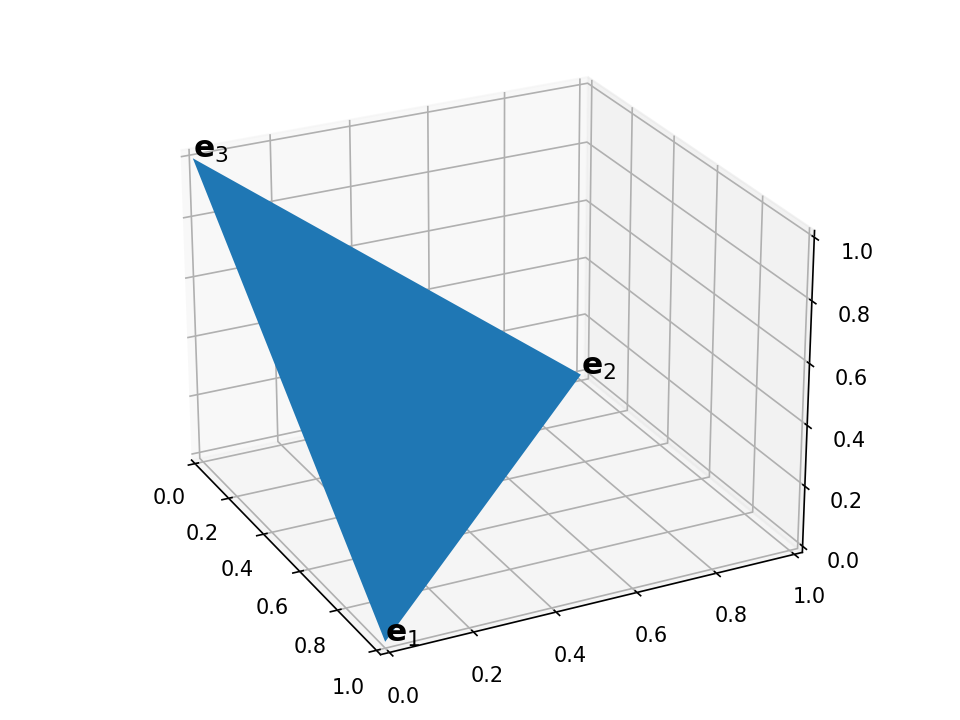

In [2]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

e1 = [1,0,0]
e2 = [0,1,0]
e3 = [0,0,1]

verts = [list(zip(e1, e2, e3))]
ax.add_collection3d(Poly3DCollection(verts))
for i, e in enumerate([e1, e2, e3], start=1):
    ax.text3D(*e, "$\mathbf{e}_" + f"{i}$", size=15)
plt.show()

<IPython.core.display.Javascript object>


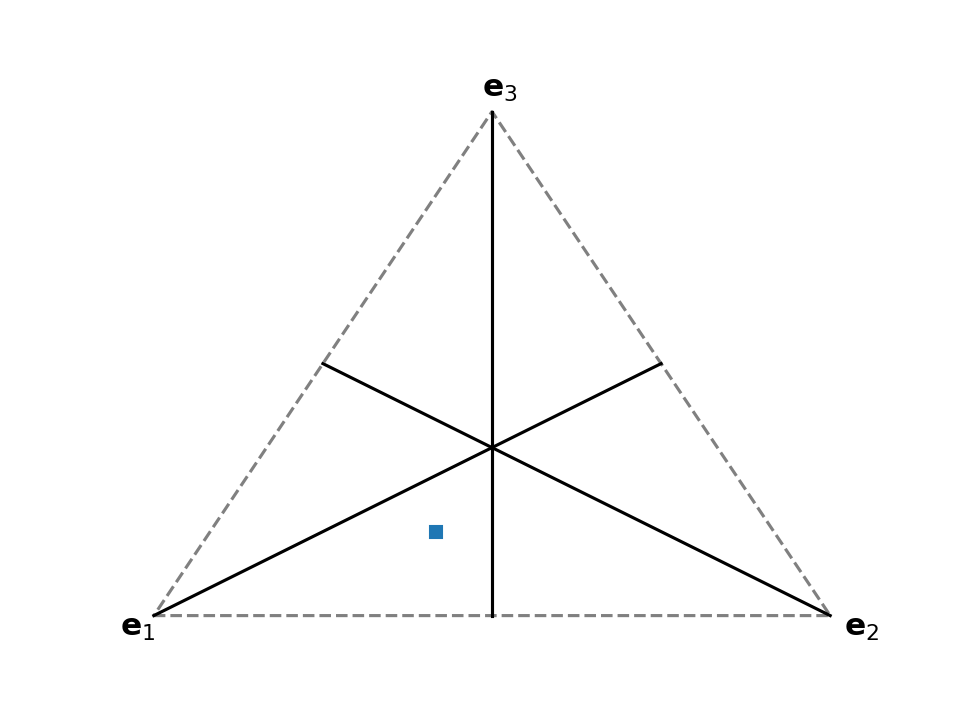

In [3]:
basis = np.array([[-sqrt(3)/2, -1/2], [sqrt(3)/2, -1/2], [0, 1]])
labels1 = ['$c_1$', '$c_2$', '$c_3$']
labels2 = [r'$\mathbf{e}_1$', r'$\mathbf{e}_2$', r'$\mathbf{e}_3$']
contour = np.append(basis, basis[:1], axis=0)

def normalize(tally):
    return tally/sum(tally)

tally = np.array([3, 2, 1])

n_tally = normalize(tally)

fig = plt.figure()

# Outer boundary of the representation triangle
plt.plot(*contour.transpose(), '--', color='grey')

# Indifference lines (or tie lines)
for base in basis:
    plt.plot(*np.array([base, -1/2 * base]).transpose(), color='black')

# Unanimity points    
# plt.plot(*basis.transpose(), 'o', color='grey')

# Draw texts at unanimity points
for label, coord in zip(labels2, basis):
    x, y = 1.07 * coord - 0.025
    plt.text(x, y, label, size=15)

# Draw election result
plt.plot(*np.matmul(basis.transpose(), n_tally).transpose(), 's')

plt.axis('off')
plt.show()

## 2.2 投票プロファイルと選挙写像
"Profiles and Election Mappings"

ここでは、各投票者の選好が、狭義線形順序(strict linear order)がであると仮定する。

投票者の型(type)とは、その投票者の候補のランク付けのこととする。全部で $n!$ 通りの可能性がある。i.e. $n!$ の投票者型がある。

今, $n=3$ の場合を考え、以下のように型に番号を振り分ける。

|型|ランキング |
|-|-|
|1|$$c_1\succ c_2 \succ c_3$$|
|2|$$c_1\succ c_3 \succ c_2$$|
|3|$$c_3\succ c_1 \succ c_2$$|
|4|$$c_3\succ c_2 \succ c_1$$|
|5|$$c_2\succ c_3 \succ c_1$$|
|6|$$c_2\succ c_1 \succ c_3$$|

__*定義2.2.1*__ (p.38) $p_j$ を、$j$ 番目の型($j=1,\dots,n!$) の全体に対する割合を表すとする。ベクトル $\textbf{p} = (p_1,\dots,p_{n!})$ を __(正規化)投票プロファイル__ と呼ぶ。

# 第3章 コンドルセの問題

"Problem with Condorcet"

# 第4章 順序付け投票とボルダスコアリング

"Positional Voting And the BC (Borda Count)"

# 第5章 その他の投票問題

"Other Voting Issues"

Let us construct a projection $p_{\hat{\textbf{n}} }$ on the plane perpendicular to
$$ \hat{\textbf{n}} := \frac{\textbf{e}_1 + \textbf{e}_2 + \textbf{e}_3}{\lVert \textbf{e}_1 + \textbf{e}_2 + \textbf{e}_3 \rVert_2}
= \left(\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}\right)$$


Take the 1st perpendicular vector to be
$$\textbf{b}_1 = \textbf{e}_3 - (\textbf{e}_3 \cdot \hat{\textbf{n}})\hat{\textbf{n}}
=\begin{pmatrix}  0 \\ 0\\ 1 \end{pmatrix}
-\begin{pmatrix}  \frac{1}{3}\\ \frac{1}{3}\\ \frac{1}{3} \end{pmatrix}
= \begin{pmatrix}  -\frac{1}{3}\\ -\frac{1}{3}\\ \frac{2}{3} \end{pmatrix} $$
and normalizing it, we get the first base of the plane 
$$\hat{\textbf{b}}_1 = 
\begin{pmatrix}  -\frac{1}{\sqrt{6}}\\ -\frac{1}{\sqrt{6}}\\ \frac{2}{\sqrt{6}} \end{pmatrix}$$

$$\hat{\textbf{b}}_2 =
\begin{pmatrix}  \frac{1}{- \sqrt{6}}\\ - \frac{1}{\sqrt{6}}\\ \frac{2}{\sqrt{6}} \end{pmatrix} \times 
\begin{pmatrix}  \frac{1}{\sqrt{3}}\\ \frac{1}{\sqrt{3}}\\ \frac{1}{\sqrt{3}} \end{pmatrix}
= \begin{pmatrix}  - \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}}\\ 0 \end{pmatrix}$$
Then $p_{\hat{\textbf{n}}}$ can be defined as follows
$$p_{\hat{\textbf{n}}}(\textbf{x}) = \sum_{i=1}^2 (\textbf{x} \cdot \hat{\textbf{b}}_i)\hat{\textbf{b}}_i$$
we represent the projected point as a point on 2D-plane comprehensing the coefficient $b_1$ of $\hat{\textbf{b}}_1$ as $y$-axis and the coefficient $b_2$ of $\hat{\textbf{b}}_2$ as $x$-axis.

In particular, the projected image of $\textbf{e}_i$ are
$$\left\{
\begin{pmatrix}  -\frac{1}{\sqrt{2}}\\ -\frac{1}{ \sqrt{6}} \end{pmatrix},
\begin{pmatrix}  \frac{1}{\sqrt{2}}\\ - \frac{1}{\sqrt{6}} \end{pmatrix},
\begin{pmatrix}  0 \\  \frac{2}{\sqrt{6}} \end{pmatrix}
\right\}
$$